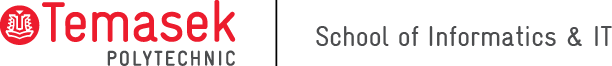
### <center>  Data Science Essentials (CIA1C14)</center>
### <center>  Individual Assignment (45%)</center>

### <font color=red>Fill in your personal data below

#### <font color=blue>Name:<font color=black>Edzran Hisham
#### <font color=blue>Admin No:<font color=black>2004986B
#### <font color=blue>Class: <font color=black> P03

### <font color=red> Declaration of Originality

#### I declare that I am the originator of this work and that all other original sources used in this work have been appropriately acknowledged.

#### I understand that plagiarism is the act of taking and using the whole or any part of another person’s work and presenting it as my own without proper acknowledgement.

#### I understand that allowing someone else to copy my work and submit it as their own is also considered as plagiarism.

#### I also understand that plagiarism is an academic offence and that disciplinary action will be taken for plagiarism.”

#### Please sign your name or insert a picture of your signature in the markdown cell below. (double click on the cell)


Edzran

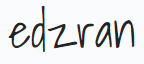

#### 1. This deliverable is worth 45% of the final marks for DSES. The total marks for it is 90 marks. The due date is  <font color=red>11 Aug 2021 (Wed) 11:59 pm.
#### 2. This is an individual deliverable. You are required to produce your own work.
#### 3. You are allowed to use packages (libraries) not covered in the lecture slides or practicalsbject (e.g. scikit-learn, seaborn, etc.)
#### 4. Apart from using Markdown cells to include your description, take-aways, and comments, provide sufficient comments to your codes too. 
#### 5. Name your notebook according to the following format. 
>If you are from P01 and your student ID is 1900001A, then rename this notebook to
>YourName_P01_1900001A_Assignment
#### 6. You need to submit your deliverable, i.e. this Jupyter Notebook in two different formats (ipynb and html).
>1. html format is for plagiarism check
>2. ipynb format is for marking

#### <font color= red><i> Run the following codes to generate your own subset of data for this report.

In [ ]:
import pandas as pd
file=r"./Assignment_Dataset.csv" #replace with your own path
full_data=pd.read_csv(file, delimiter=",") #this is the full set
your_admn=input("Enter the last 4 digits of your admin no.: ")
your_class=int(input("Enter the last digit of your practical group: "))
if your_class!=1:
    your_seed=int(str(your_class-1)+your_admn)
else:
    your_seed=int(str(your_class)+your_admn)
bank_data=full_data.iloc[your_seed-10000: your_seed,:]  #generate your own set for use
#check with you have 1000 rows by 25 columns
bank_data.shape

In [ ]:
import os as os
os.chdir("C:\\Users\\User\\Desktop\\TP Y2\\Data Science and Essentials\\Individual Assignment")
# if u wish to export this dataframe to external csv file
bank_data.to_csv("MyOwnData.csv", index=False) # File will be inside same directory

# <font color= maroon> Project Background & Aims 

#### Background
A bank in Country X had collected data about the number of defaulted credit card payments (i.e. client’s failure to make payment to credit card bill) that occurred over a period of six months. These data relate to demographic factors, credit data, history of payment, and bill statements. 

#### Aim
Through the steps of Data Science Life Cycle, the aim is to build a model to reduce the number of defaults for the bank.

#### Problem Statement
The bank wants to understand how the profile and behavior of the client affect the possibility of payment default, and be able to assess the credibility of future card applicants. (type)

#### Data Dictionary

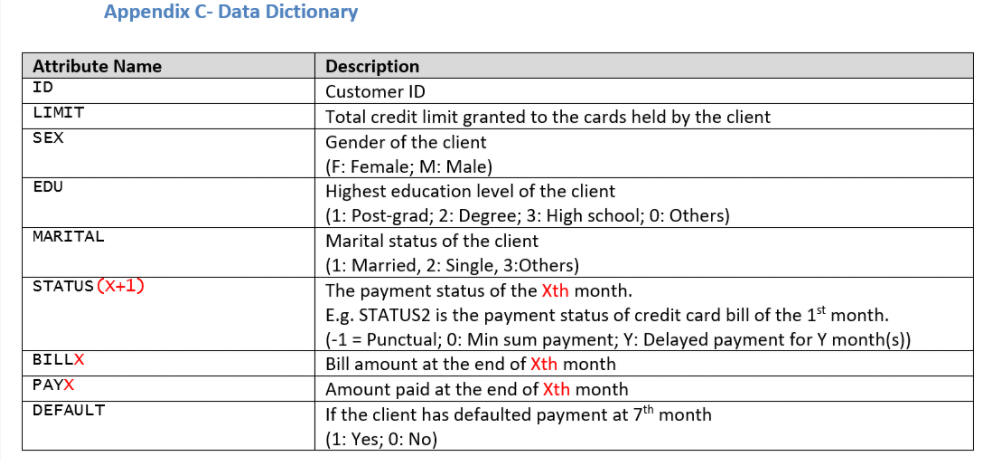

# <font color= maroon> Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans #to enable the k-means algo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder #one-hot encoding
from sklearn.preprocessing import LabelEncoder #encoding binary viarables
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
bank_data=pd.read_csv('./MyOwnData.csv')

## <font color= maroon> Data Understanding 
    
I will now take a look at the data and try to gain a brief understanding 

#### Levels of measurement

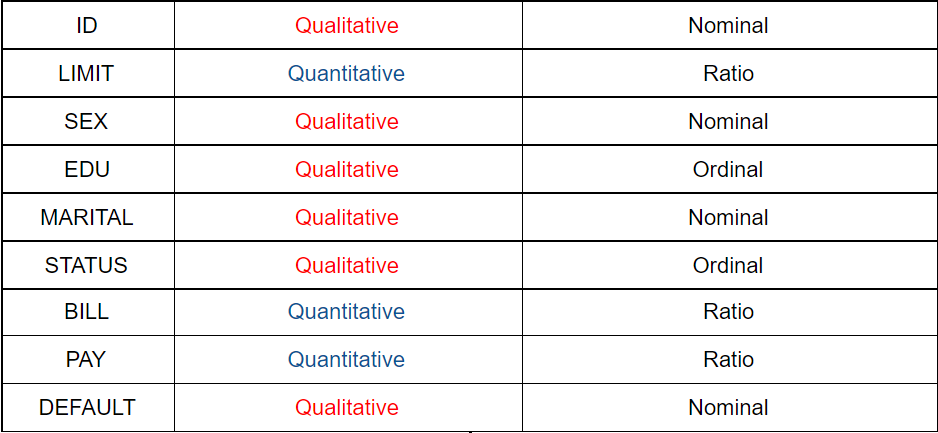

In [3]:
# Payment delay description
bank_data[['STATUS2', 'STATUS3', 'STATUS4', 'STATUS5', 'STATUS6', 'STATUS7']].describe()

,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.189800,0.152500,0.124700,0.114600,0.055300,0.060200
std,0.908107,0.948121,0.905667,0.928199,0.853648,0.838598
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000


In [4]:
#Printing first 5 rows of data
bank_data.head()



,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
0,14987.0,20000.0,F,1.0,2.0,25.0,1.0,2.0,0.0,0.0,...,17000.0,17000.0,20000.0,2.0,2000.0,3000.0,0.0,3000.0,0.0,0.0
1,14988.0,380000.0,F,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,224029.0,224022.0,225978.0,10018.0,10000.0,15000.0,30000.0,30251.0,20000.0,0.0
2,14989.0,70000.0,F,1.0,1.0,42.0,0.0,0.0,0.0,0.0,...,43378.0,46664.0,47341.0,1994.0,1709.0,1567.0,4000.0,1600.0,2000.0,1.0
3,14990.0,300000.0,F,2.0,1.0,40.0,-1.0,-1.0,-1.0,-1.0,...,683.0,172.0,402.0,1278.0,4045.0,685.0,172.0,402.0,4080.0,0.0
4,14991.0,160000.0,M,3.0,2.0,27.0,1.0,2.0,-1.0,0.0,...,15676.0,99436.0,90927.0,0.0,142848.0,1800.0,90000.0,3300.0,3400.0,1.0


In [5]:
bank_data.info()

#There are a total of 10000 rows and 25 columns
#It looks like columns "Education" and "Marital" has missing values. 
#Data type for most columns are float while "sex" column is the only object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         10000 non-null  float64
 1   LIMIT      10000 non-null  float64
 2   SEX        10000 non-null  object 
 3   EDUCATION  9992 non-null   float64
 4   MARITAL    9979 non-null   float64
 5   AGE        10000 non-null  float64
 6   STATUS2    10000 non-null  float64
 7   STATUS3    10000 non-null  float64
 8   STATUS4    10000 non-null  float64
 9   STATUS5    10000 non-null  float64
 10  STATUS6    10000 non-null  float64
 11  STATUS7    10000 non-null  float64
 12  BILL1      10000 non-null  float64
 13  BILL2      10000 non-null  float64
 14  BILL3      10000 non-null  float64
 15  BILL4      10000 non-null  float64
 16  BILL5      10000 non-null  float64
 17  BILL6      10000 non-null  float64
 18  PAY1       10000 non-null  float64
 19  PAY2       10000 non-null  float64
 20  PAY3   

In [6]:
# Finding missing values
# Marital - 21 missing
# Education - 8 missing
bank_data.isna().sum()

ID            0
LIMIT         0
SEX           0
EDUCATION     8
MARITAL      21
AGE           0
STATUS2       0
STATUS3       0
STATUS4       0
STATUS5       0
STATUS6       0
STATUS7       0
BILL1         0
BILL2         0
BILL3         0
BILL4         0
BILL5         0
BILL6         0
PAY1          0
PAY2          0
PAY3          0
PAY4          0
PAY5          0
PAY6          0
DEFAULT       0
dtype: int64

In [7]:
# Looking for duplicates - 0 duplicates
bank_data.duplicated().sum()

0

In [8]:
bank_data.describe()

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
count,10000.00000,10000.000000,9992.000000,9979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19986.50000,166260.000000,1.799039,1.545846,35.394700,0.189800,0.152500,0.124700,0.114600,0.055300,...,46443.599700,41890.193300,40428.471700,5435.699900,5787.121900,5743.464000,4825.124700,4662.870300,5102.633900,0.219800
std,2886.89568,127773.804101,0.724237,0.515716,13.183319,0.908107,0.948121,0.905667,0.928199,0.853648,...,66452.288617,61693.739461,59234.645672,14116.730605,16602.286051,17449.643212,15464.547133,14200.253844,16489.275795,0.414132
min,14987.00000,10000.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-65167.000000,-81334.000000,-46627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17486.75000,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2906.250000,2189.750000,1730.250000,1000.000000,1006.750000,884.250000,326.000000,300.000000,266.500000,0.000000
50%,19986.50000,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20397.500000,19038.500000,18442.000000,2100.000000,2274.500000,2000.000000,1500.000000,1573.000000,1615.500000,0.000000
75%,22486.25000,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59953.750000,52013.500000,50757.500000,5001.000000,5050.250000,5000.000000,4111.000000,4189.750000,4190.750000,0.000000
max,24986.00000,800000.000000,3.000000,3.000000,999.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,616836.000000,823540.000000,501370.000000,276698.000000,388126.000000,380478.000000,528897.000000,331788.000000,422000.000000,1.000000


Interesting finding: 

AGE column has a minimum value of -1 and a max value of 999. These values are impossible for AGE column.

In [9]:
bank_data.AGE.unique()

array([ 25.,  41.,  42.,  40.,  27.,  32.,  51.,  37.,  26.,  24.,  29.,
        28.,  22.,  34.,  35.,  36.,  43.,  33.,  39.,  47.,  44.,  45.,
        38.,  31.,  48.,  46.,  50.,  56.,  55.,  61.,  53.,  52.,  65.,
        54.,  58.,  66.,  63.,  57.,  23.,  21.,  30.,  49.,  69.,  59.,
        -1.,  60.,  62.,  64.,  67.,  70.,  79., 999.,  72.,  68.])

After taking a look at the data, I understand that:

- There are a total of 10000 rows and 25 columns 
- Data type for most columns are float while "sex" column is the only object type
- For now I can think of SEX to be changed to a numerical value for transformation as I would like to perform regression later on. 
- It looks like columns "Marital" and "Education" has missing values of 21 and 8 respectively.
- People in the data are mostly Post-grad, Degree
- Average age is around 35 
- AGE column has a minimum value of -1 and a max value of 999, which would be handled later on in data cleaning


# <font color= maroon>  Data Understanding through EDA

### Distribution of clients defaulting 

In [10]:
# The frequency(counts) of defaults
default_count_yes = bank_data.DEFAULT.sum()
default_count_no = len(bank_data) - default_count_yes

# Converting count of default to percentage
default_perc_yes = round(default_count_yes/len(bank_data)*100, 1)
default_perc_no = round(default_count_no/len(bank_data)*100, 1)

C:\Users\User\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


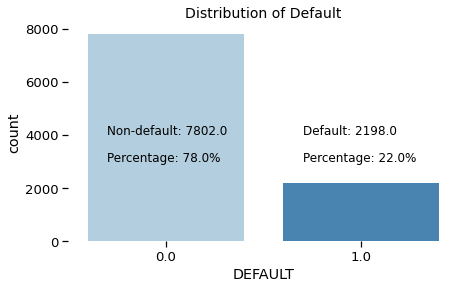

In [11]:
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEFAULT',data=bank_data, palette="Blues")
plt.annotate('Non-default: {}'.format(default_count_no), xy=(0.0, 4000), xytext=(-0.3, 4000), fontsize=12)
plt.annotate('Default: {}'.format(default_count_yes), xy=(1.0, 4000), xytext=(0.7, 4000), size=12)
plt.annotate('Percentage: {}%'.format(default_perc_no), xy=(0.0, 4000), xytext=(-0.3, 3000), fontsize=12)
plt.annotate('Percentage: {}%'.format(default_perc_yes), xy=(1.0, 4000), xytext=(0.7, 3000), fontsize=12)
plt.title('Distribution of Default', size=14)
#Removing the frame
plt.box();

Take-aways:

It looks like 22%(2198) of clients will default payment on the 7th month.


### Distribution of amount of credit limit

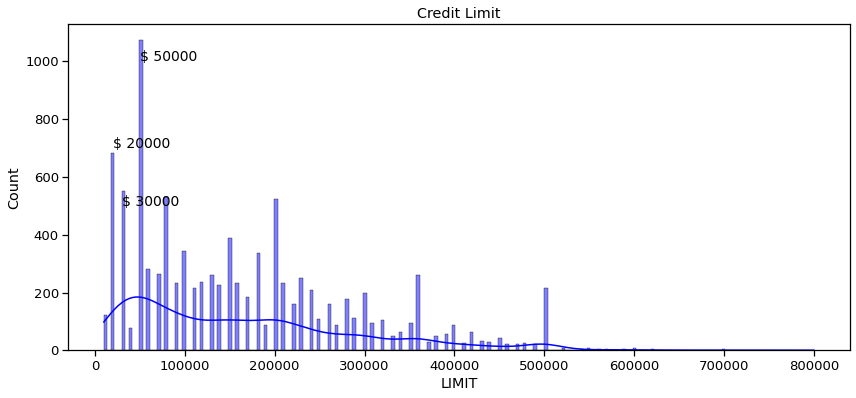

In [12]:
 
plt.annotate(text='$ 50000', xy=(50000,1000), xycoords='data', fontsize=14)
plt.annotate(text='$ 20000', xy=(20000,700), xycoords='data', fontsize=14)
plt.annotate(text='$ 30000', xy=(30000,500), xycoords='data', fontsize=14)
sns.histplot(bank_data['LIMIT'],kde=True,bins=200, color="blue")
plt.show()

In [13]:
bank_data['LIMIT'].value_counts().head(5)

50000.0     1075
20000.0      682
30000.0      552
80000.0      529
200000.0     523
Name: LIMIT, dtype: int64

Take-away:

The amount of credit limit that most people get is 50k, followed by 20k and 30k of about 1075, 682 and 552 respectively.

On the extreme spectrum, there also seems to be people who receive credit limits of more than 500k and upwards, up to 800k. 


### Proportion of credit card users by Marital status

In [14]:
marital_data_pie = bank_data.groupby('MARITAL').count()

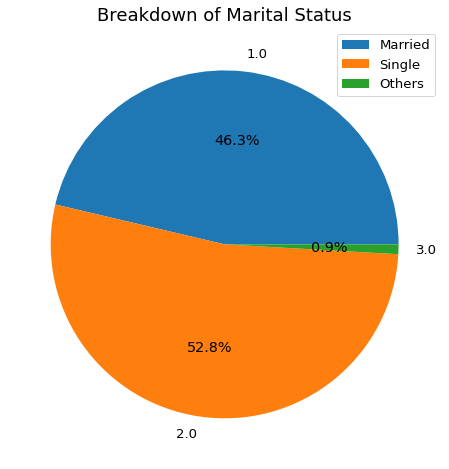

In [15]:
plt.figure(figsize=(8,8))
plt.pie(marital_data_pie.ID, autopct='%1.1f%%', labels=marital_data_pie.index)

plt.title('Breakdown of Marital Status', fontsize=18)
plt.legend(labels=['Married', 'Single', 'Others'])
plt.show()

Take-away: 

The most amount of credit card users are Single of about 52.8%, followed by 46.3% of users who are Married. Users with "Others" status make up the last 0.9%


### Proportion of credit card users by Education status

In [16]:
education_data_pie = bank_data.groupby('EDUCATION').count()
education_data_pie

,ID,LIMIT,SEX,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0.0,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201
1.0,3223,3223,3223,3222,3223,3223,3223,3223,3223,3223,...,3223,3223,3223,3223,3223,3223,3223,3223,3223,3223
2.0,4951,4951,4951,4949,4951,4951,4951,4951,4951,4951,...,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951
3.0,1617,1617,1617,1599,1617,1617,1617,1617,1617,1617,...,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617


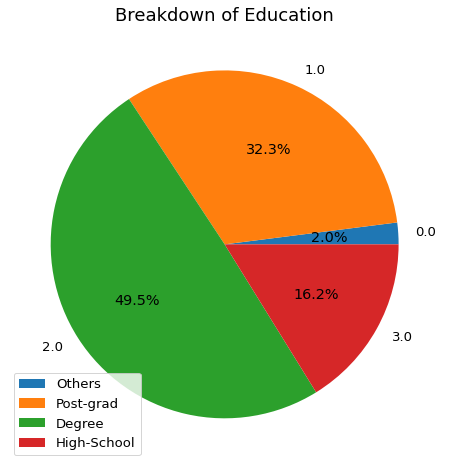

In [17]:
plt.figure(figsize=(8,8))
plt.pie(education_data_pie.ID, autopct='%1.1f%%', labels=education_data_pie.index)

plt.title('Breakdown of Education', fontsize=18)
plt.legend(labels=['Others', 'Post-grad', 'Degree','High-School'])
plt.show()

In [18]:
bank_data['EDUCATION'].value_counts().head(5)

2.0    4951
1.0    3223
3.0    1617
0.0     201
Name: EDUCATION, dtype: int64

Take-away:

Most credit card users in the data have mostly Degree and Post-grad education

Credit card users holding Degrees make up the most proportion of the data of 49.5%(4951). Second highest Post-grad occupies 32.3%(3223) of data, followed by High-School of 16.2%(1617) and Others of 2.0%(201)

### Distribution between Education and Credit Limit


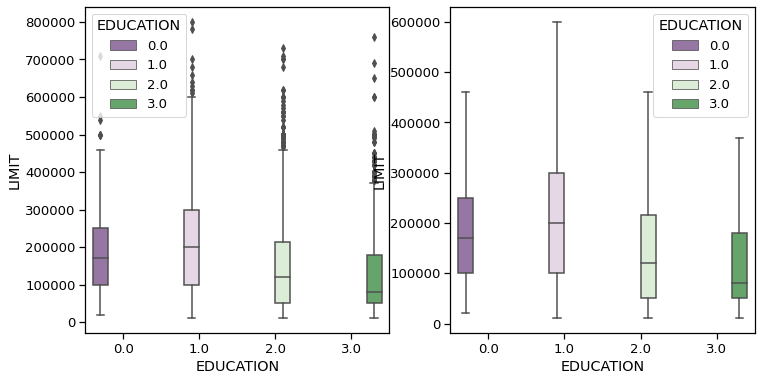

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="EDUCATION", y="LIMIT", hue="EDUCATION",data=bank_data, palette="PRGn",showfliers=True)

s = sns.boxplot(ax = ax2, x="EDUCATION", y="LIMIT", hue="EDUCATION",data=bank_data, palette="PRGn",showfliers=False)

plt.show(); 

Take away:

The higher the education level a client has, the more credit limit is awarded.

Post-grad boxplot has the highest median and IQR range. Thus clients with Post-grad education generally receive the most credit limit compared to other education levels. 

Clients with high-school education level generally receive lesser credit limit compared to other education levels. 

### Distribution between Education, Credit Limit and Marriage status

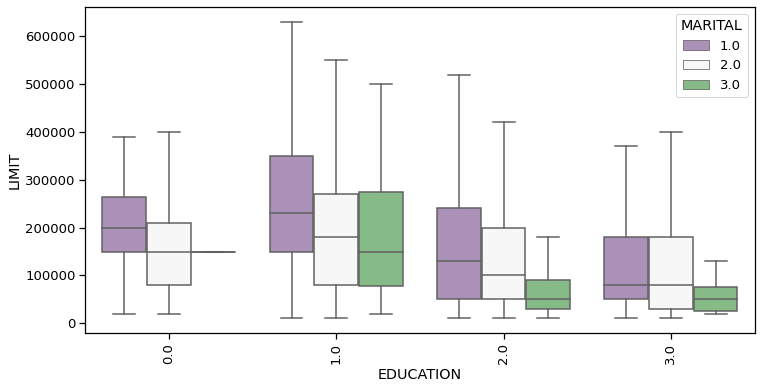

In [20]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
s = sns.boxplot(ax = ax1, x='EDUCATION', y='LIMIT', hue='MARITAL',
                data=bank_data, palette="PRGn",showfliers=False)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

Take-away: 

(1)

Clients who are married and have higher education levels receiver higher credit limit.

Generally across the chart, we can see that the boxplots for Married clients(1.0) have higher median and IQR range compared to the boxplots of other marital statuses.

Furthermore, clients who are married AND have Post-grad education level are granted the most amount of credit limit.


(2)

The bank does not receive many clients with the odd combination of both "Other" status in both Education level and Marital status. In the cell below, we can see that there are only 2 clients with the combination.



In [21]:
education_others = bank_data.EDUCATION == 0.0
marital_others = bank_data.MARITAL == 3.0

bank_data[education_others & marital_others]

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
8012,22999.0,150000.0,F,0.0,3.0,49.0,1.0,0.0,-1.0,-1.0,...,10410.0,2361.0,2868.0,4.0,7920.0,10426.0,0.0,2868.0,4384.0,0.0
8951,23938.0,150000.0,M,0.0,3.0,27.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,1147.0,6000.0,0.0,0.0,0.0,0.0,0.0


### Correlation of Education level to the likelihood of credit card default

In [22]:
# Creating a new dataframe to find out amount of clients who have defaulted based on Education level using pd.crosstab()
# and passing in the EDUCATION and DEFAULT
education_default = pd.crosstab(bank_data.EDUCATION, bank_data.DEFAULT)
education_default

DEFAULT,0.0,1.0
EDUCATION,,
0.0,187,14
1.0,2665,558
2.0,3746,1205
3.0,1196,421


In [23]:
#Computing the percentage of clients who have defaulted and storing into new column called "default_perc"
education_default['default_perc'] = (education_default[1]/(education_default[0] + education_default[1]) * 100) 

education_default['default_perc']

EDUCATION
0.0     6.965174
1.0    17.313062
2.0    24.338517
3.0    26.035869
Name: default_perc, dtype: float64

<AxesSubplot:xlabel='EDUCATION'>

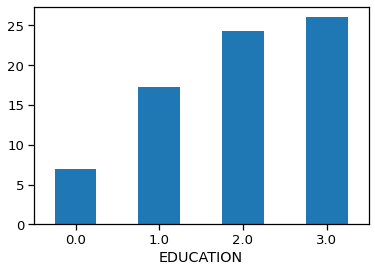

In [24]:
#Using a barchart to visualize percentage of clients who have defaulted based on their Education level using .plot()
education_default['default_perc'].plot(kind='bar', stacked = True, rot=0)

Take-aways:

- The higher education levels a client has, the lower the probability of defaulting. Clients who have higher education levels tend to make more timely payments compared to clients with lower education levels.

- Although despite, clients who have "Other" education level having the lowest probability, the amount of clients having "Other" education level is very low. As previously seen in the pie-chart which shows the "Breakdown of Education status", only 2% of clients in the entire dataset have "Other" education level. Thus, this should be taken into consideration as the probability may not be appropriate to be compared to due to its numerical size.

### Checking for skewness

Skewed data can mess up the power of my predictive model if not address correctly. In the later part of my project, I would be doing KMeans clustering as well.

Depending on our application whether we want to handle the skewness in our dataset or not for a clustering problem. For instance, if we want to do clustering for anamoly detection, in that case we wouldnt want to handle the outliers as we would like our model to detect them and group them in a cluster

For my application, I am looking for a good visualization so I would like to handle the skewness as much as possible as it will help the model to form better clusters.

In [25]:
bank_data.head()

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
0,14987.0,20000.0,F,1.0,2.0,25.0,1.0,2.0,0.0,0.0,...,17000.0,17000.0,20000.0,2.0,2000.0,3000.0,0.0,3000.0,0.0,0.0
1,14988.0,380000.0,F,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,224029.0,224022.0,225978.0,10018.0,10000.0,15000.0,30000.0,30251.0,20000.0,0.0
2,14989.0,70000.0,F,1.0,1.0,42.0,0.0,0.0,0.0,0.0,...,43378.0,46664.0,47341.0,1994.0,1709.0,1567.0,4000.0,1600.0,2000.0,1.0
3,14990.0,300000.0,F,2.0,1.0,40.0,-1.0,-1.0,-1.0,-1.0,...,683.0,172.0,402.0,1278.0,4045.0,685.0,172.0,402.0,4080.0,0.0
4,14991.0,160000.0,M,3.0,2.0,27.0,1.0,2.0,-1.0,0.0,...,15676.0,99436.0,90927.0,0.0,142848.0,1800.0,90000.0,3300.0,3400.0,1.0


In [26]:
# drop sex column as it is a categorical value and cannot be plotted onto kdeplot
skew_data = bank_data.drop(columns=['SEX'])
skew_data.shape

(10000, 24)

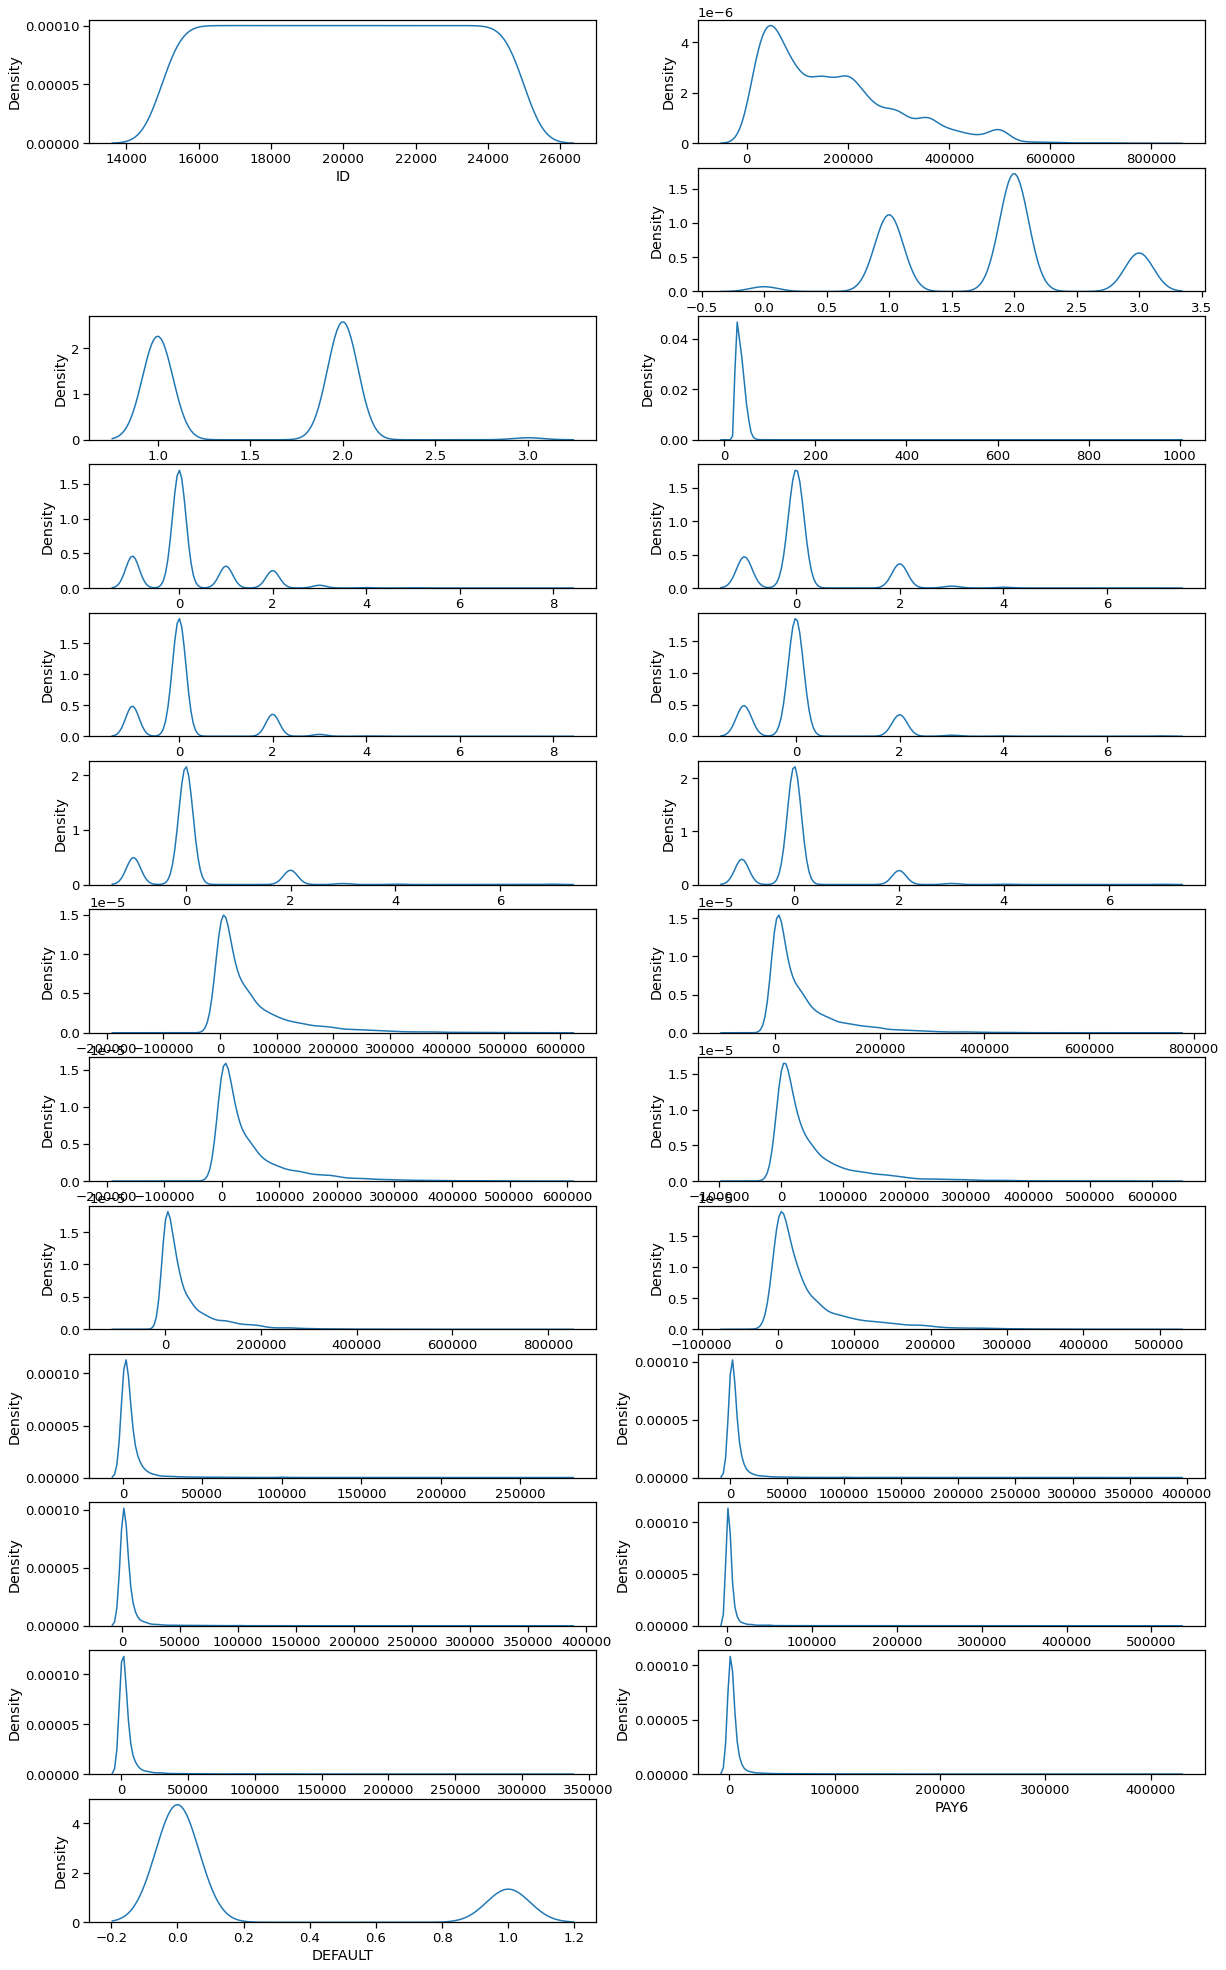

In [27]:
plt.figure(figsize=(20,35))
for i, col in enumerate(bank_data.columns):
    if bank_data[col].dtype != 'object':
        ax = plt.subplot(13, 2, i+1)
        sns.kdeplot(bank_data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Take-away:

It seems that there are a lot of skewness and they are varied. Making my predictors and target variable more normally distributed can help in having more reliable predictions later on.

It may not be possible to transform into a perfect normal distribution but i will try later on in data transformation.

In [28]:
bank_data['STATUS2'].skew()
# using a np.log() would change skewness to nan
# data wont show up in skewness

1.4212838166837336

### Correlation matrix to determine important features affecting Default

In [29]:
corr_mat=bank_data.corr()

# Color code the correlation codefficients based on intensity level
corr_mat.style.background_gradient(cmap='Reds')

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
ID,1.000000,0.114183,-0.065606,0.006751,0.005178,-0.078553,-0.084398,-0.071952,-0.080180,-0.063268,-0.064679,0.015270,0.010722,0.012568,0.019965,0.012605,0.014371,0.022864,0.031126,0.041410,0.022103,0.043727,0.041139,-0.051745
LIMIT,0.114183,1.000000,-0.243800,-0.089266,0.086130,-0.207878,-0.233550,-0.224197,-0.216265,-0.198153,-0.187725,0.297548,0.286837,0.289272,0.295789,0.306999,0.303915,0.194636,0.197140,0.208200,0.207942,0.223207,0.223129,-0.194178
EDUCATION,-0.065606,-0.243800,1.000000,-0.148449,0.120852,0.097476,0.121226,0.105685,0.107539,0.098574,0.080835,-0.005335,-0.006264,-0.010412,-0.016983,-0.023683,-0.016637,-0.046891,-0.053165,-0.061585,-0.048223,-0.038349,-0.053180,0.092316
MARITAL,0.006751,-0.089266,-0.148449,1.000000,-0.287712,-0.009214,-0.009330,0.003565,-0.004586,0.000716,0.006560,-0.024545,-0.019258,-0.021963,-0.020381,-0.020717,-0.017278,0.010796,-0.004906,0.001374,-0.010708,0.006322,-0.010162,-0.023988
AGE,0.005178,0.086130,0.120852,-0.287712,1.000000,-0.003861,0.001833,0.000953,-0.004236,-0.005939,-0.006365,0.034532,0.035627,0.036162,0.038568,0.036869,0.029679,0.016710,0.011364,0.016334,0.003643,0.006897,0.009710,0.007207
STATUS2,-0.078553,-0.207878,0.097476,-0.009214,-0.003861,1.000000,0.671331,0.525599,0.479520,0.451545,0.416140,0.091315,0.095185,0.089744,0.087250,0.095023,0.093968,-0.093281,-0.082503,-0.083729,-0.063681,-0.065190,-0.054666,0.394859
STATUS3,-0.084398,-0.233550,0.121226,-0.009330,0.001833,0.671331,1.000000,0.661526,0.518802,0.480138,0.444294,0.107830,0.105597,0.098597,0.094580,0.101898,0.105243,-0.145262,-0.098764,-0.088638,-0.062573,-0.061190,-0.056149,0.343296
STATUS4,-0.071952,-0.224197,0.105685,0.003565,0.000953,0.525599,0.661526,1.000000,0.632808,0.518346,0.481941,0.078897,0.101077,0.094491,0.092006,0.097737,0.100880,-0.039212,-0.134230,-0.096980,-0.073044,-0.062832,-0.060579,0.293821
STATUS5,-0.080180,-0.216265,0.107539,-0.004586,-0.004236,0.479520,0.518802,0.632808,1.000000,0.706399,0.587815,0.057289,0.073982,0.090855,0.084249,0.091283,0.093555,-0.050738,-0.041744,-0.146799,-0.078071,-0.067424,-0.055847,0.263064
STATUS6,-0.063268,-0.198153,0.098574,0.000716,-0.005939,0.451545,0.480138,0.518346,0.706399,1.000000,0.732850,0.071851,0.087178,0.099754,0.116820,0.116890,0.117374,-0.041995,-0.040065,-0.035220,-0.128358,-0.070840,-0.055892,0.262372


In [30]:
#Correlation with target
cor_target=abs(corr_mat['DEFAULT'])
#threshold to select only highly relevant features
relevant_features=cor_target[cor_target>0.2]
relevant_features

STATUS2    0.394859
STATUS3    0.343296
STATUS4    0.293821
STATUS5    0.263064
STATUS6    0.262372
STATUS7    0.254476
DEFAULT    1.000000
Name: DEFAULT, dtype: float64

In [31]:
#Correlation with target
cor_target=abs(corr_mat['LIMIT'])
#threshold to select only highly relevant features
relevant_features=cor_target[cor_target>0.25]
relevant_features

LIMIT    1.000000
BILL1    0.297548
BILL2    0.286837
BILL3    0.289272
BILL4    0.295789
BILL5    0.306999
BILL6    0.303915
Name: LIMIT, dtype: float64

Take-away:

Focusing on the DEFAULT column

- Although weak, Payment history status(STATUS) has a highest correlation to the probability of clients defaulting payment on the 7th month. The more months client has delayed payment, the higher the probability that the client would default payment on the 7th month. 
- Thus, payment status (STATUS 2, 3, 4 .. etc) may be important predictors to DEFAULT(X)
- However with that being said, it may not be the only features that could predict and a good accuracy model may be dependant on a combination of all features instead of just one or a few.

BILL_AMT columns:
- There is high multicollinearity between BILL_AMT columns. This makes sense as a client may have similar bill amounts and when one goes bill increases, the others may increase as well.

STATUS columns:
- STATUS columns measure the repayment status and how late a client is on their payment. There is high multicollinearity between the columns, and it makes sense as if they are late on one, they may be late on other payments as well. 

# <font color= maroon>  Data Preparation 
    
Enter your general description here.

## <font color= grey> Data Cleaning

### Dealing with missing values.
    
As discovered previously, the columns containing missing values are:
- MARITAL: 21
- EDUCATION: 8

Percentage of Missing Values:
 ID           0.00
LIMIT        0.00
SEX          0.00
EDUCATION    0.08
MARITAL      0.21
AGE          0.00
STATUS2      0.00
STATUS3      0.00
STATUS4      0.00
STATUS5      0.00
STATUS6      0.00
STATUS7      0.00
BILL1        0.00
BILL2        0.00
BILL3        0.00
BILL4        0.00
BILL5        0.00
BILL6        0.00
PAY1         0.00
PAY2         0.00
PAY3         0.00
PAY4         0.00
PAY5         0.00
PAY6         0.00
DEFAULT      0.00
dtype: float64


<AxesSubplot:>

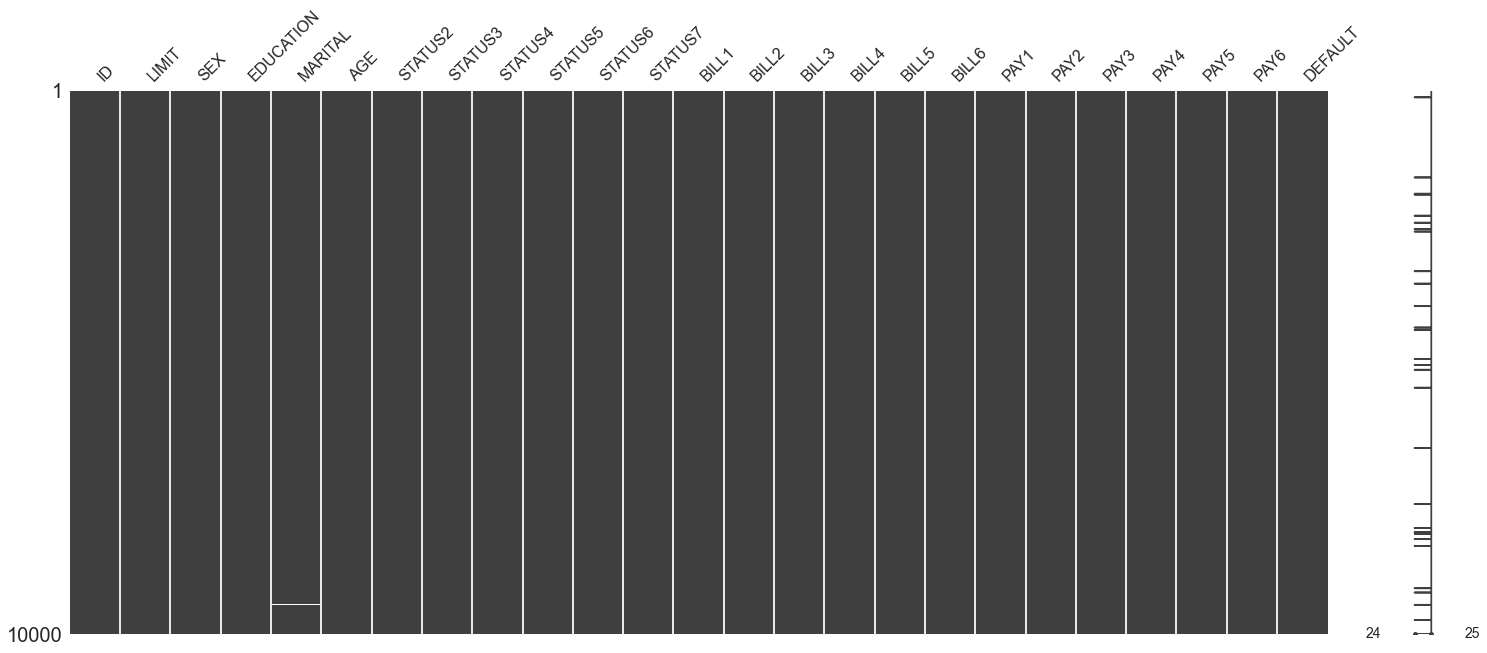

In [3]:
# Visualizing amount of missing values in data using msno.matrix()

# Create a nullity DataFrame airquality_nullity
bankdata_nullity = bank_data.isna()

# Calculate total of missing values
missing_values_sum = bankdata_nullity.sum()

# Calculate percentage of missing values
missing_values_percent = bankdata_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# Plot amount of missingness
msno.matrix(bank_data)





Method to handle missing values:

##### List-wise or Complete Case.

As the amount of missing values are small, it would be more appropriate to use listwise deletion as compared to pairwise deletion which may negatively affect our later analysis. 

In [4]:
#deleting rows containing missing values in column 'MARITAL' and 'EDUCATION'
bank_data.dropna(subset=['MARITAL','EDUCATION'], how='any', inplace=True)

#checking for any missing values in data after remedy
bank_data.isna().sum()

ID           0
LIMIT        0
SEX          0
EDUCATION    0
MARITAL      0
AGE          0
STATUS2      0
STATUS3      0
STATUS4      0
STATUS5      0
STATUS6      0
STATUS7      0
BILL1        0
BILL2        0
BILL3        0
BILL4        0
BILL5        0
BILL6        0
PAY1         0
PAY2         0
PAY3         0
PAY4         0
PAY5         0
PAY6         0
DEFAULT      0
dtype: int64

In [34]:
# checking amount of rows left after deletion
bank_data.shape

(9971, 25)

#### Age column values with min value of -1 and max 999
As previously discovered, the AGE column has min and max values of -1 and 999 which do not make sense. 

In [5]:
# finding specifc index rows that contain AGE == -1 and 999 values

bank_data.AGE[bank_data.AGE == -1]

487   -1.0
Name: AGE, dtype: float64

In [6]:
bank_data.AGE[bank_data.AGE == 999]

4078    999.0
Name: AGE, dtype: float64

In [7]:
# dropping rows for row index 487 and 4078 which contained -1 and 999 value 
bank_data = bank_data.drop([487, 4078])

In [8]:
# -1 and 999 value has been dropped and cannot be seen 
bank_data.AGE.unique()

array([25., 41., 42., 40., 27., 32., 51., 37., 26., 24., 29., 28., 22.,
       34., 35., 36., 43., 33., 39., 47., 44., 45., 38., 31., 48., 46.,
       50., 56., 55., 61., 53., 52., 65., 54., 58., 66., 63., 57., 23.,
       21., 30., 49., 69., 59., 60., 62., 64., 67., 70., 79., 72., 68.])

In [39]:
# New amount of rows after deletion
bank_data.shape

(9969, 25)

In [40]:
# Checking new min and max value 
bank_data.describe()

,ID,LIMIT,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,DEFAULT
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,...,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,19985.717424,166309.559635,1.796971,1.545792,35.301735,0.190390,0.153175,0.124285,0.114655,0.055873,...,46543.709299,41982.941619,40522.059685,5431.411576,5799.537266,5753.280670,4834.542181,4672.014645,5108.937005,0.220183
std,2886.674959,127855.556816,0.723174,0.515738,8.995565,0.907469,0.948043,0.904943,0.928198,0.854003,...,66520.138261,61758.235743,59295.552059,14081.413249,16625.950884,17473.227377,15486.986338,14220.725088,16509.559206,0.414390
min,14987.000000,10000.000000,0.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-65167.000000,-81334.000000,-46627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17486.000000,50000.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2946.000000,2208.000000,1746.000000,1000.000000,1015.000000,902.000000,330.000000,304.000000,270.000000,0.000000
50%,19987.000000,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20444.000000,19067.000000,18500.000000,2102.000000,2284.000000,2000.000000,1501.000000,1579.000000,1623.000000,0.000000
75%,22483.000000,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60051.000000,52175.000000,50903.000000,5001.000000,5060.000000,5000.000000,4124.000000,4200.000000,4200.000000,0.000000
max,24986.000000,800000.000000,3.000000,3.000000,79.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,616836.000000,823540.000000,501370.000000,276698.000000,388126.000000,380478.000000,528897.000000,331788.000000,422000.000000,1.000000


We can now see that AGE column has a appropriate range between 35 and 79.

## <font color= grey> Data Transformation

### Dropping ID column

ID column serves no insights and is just another index column. Therefore I shall drop it from our dataset.

In [9]:
# dropping column "ID" using .drop() and saving changes via inplace=True
bank_data.drop(columns='ID', inplace=True)

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9969 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT      9969 non-null   float64
 1   SEX        9969 non-null   object 
 2   EDUCATION  9969 non-null   float64
 3   MARITAL    9969 non-null   float64
 4   AGE        9969 non-null   float64
 5   STATUS2    9969 non-null   float64
 6   STATUS3    9969 non-null   float64
 7   STATUS4    9969 non-null   float64
 8   STATUS5    9969 non-null   float64
 9   STATUS6    9969 non-null   float64
 10  STATUS7    9969 non-null   float64
 11  BILL1      9969 non-null   float64
 12  BILL2      9969 non-null   float64
 13  BILL3      9969 non-null   float64
 14  BILL4      9969 non-null   float64
 15  BILL5      9969 non-null   float64
 16  BILL6      9969 non-null   float64
 17  PAY1       9969 non-null   float64
 18  PAY2       9969 non-null   float64
 19  PAY3       9969 non-null   float64
 20  PAY4    

### Changing data type of SEX(categorical) and DEFAULT(float) to binary

To perform linear regression, I would need to provide numerical value inputs and thus i need to convert SEX into a numeric values

In [11]:
enc = LabelEncoder()
bank_data['DEFAULT'] = enc.fit_transform(bank_data['DEFAULT'])
bank_data['SEX'] = enc.fit_transform(bank_data['SEX'])


In [12]:
bank_data['SEX']

0       0
1       0
2       0
3       0
4       1
       ..
9994    1
9995    1
9996    1
9997    1
9999    1
Name: SEX, Length: 9969, dtype: int32

### Splitting the dataframe into x variables and y variable


In [13]:
#Split df into x and y
y = bank_data['DEFAULT'] #only include column DEFAULT to be predicted
x = bank_data.drop('DEFAULT', axis=1).copy() #include every other column except DEFALUT column

In [14]:
x

,LIMIT,SEX,EDUCATION,MARITAL,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,...,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
0,20000.0,0,1.0,2.0,25.0,1.0,2.0,0.0,0.0,0.0,...,14400.0,17000.0,17000.0,20000.0,2.0,2000.0,3000.0,0.0,3000.0,0.0
1,380000.0,0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,...,236316.0,224029.0,224022.0,225978.0,10018.0,10000.0,15000.0,30000.0,30251.0,20000.0
2,70000.0,0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,42520.0,43378.0,46664.0,47341.0,1994.0,1709.0,1567.0,4000.0,1600.0,2000.0
3,300000.0,0,2.0,1.0,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,4043.0,683.0,172.0,402.0,1278.0,4045.0,685.0,172.0,402.0,4080.0
4,160000.0,1,3.0,2.0,27.0,1.0,2.0,-1.0,0.0,0.0,...,34073.0,15676.0,99436.0,90927.0,0.0,142848.0,1800.0,90000.0,3300.0,3400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,80000.0,1,1.0,2.0,40.0,-1.0,-1.0,0.0,0.0,0.0,...,38112.0,40079.0,41040.0,42994.0,37200.0,2000.0,3000.0,2000.0,3000.0,2000.0
9995,200000.0,1,1.0,1.0,42.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,240000.0,1,1.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,...,69899.0,71946.0,75425.0,74377.0,2200.0,2263.0,2930.0,5000.0,0.0,3000.0
9997,30000.0,1,2.0,2.0,44.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: DEFAULT, Length: 9969, dtype: int64

### One-hot encoding

Why One-hot encode?

The variables EDUCATION and MARRIAGE are nominal columns, while SEX is a categorical variable. 

The reason why we use One-hot encoding is to ensure that our model does not assume a natural ordering between the numbers. e.g. for EDUCATION, 3(high-school) is better than 2(Degree).

And thus, we would like to have each unique value to have its own unique column, its own feature. 

In [16]:
#create a function to one-hot encode
#create a dictionary to map column name to a prefix
def onehot_encode(df, column_dict):
    df = df.copy()
    
    #iterate between column_dict to map column name to a prefix
    for column, prefix in column_dict.items():
        # one-hot encode using pd.get _dummies
        dummies = pd.get_dummies(df[column], prefix=prefix)
        # concat original df and dummies side by side
        df = pd.concat([df,dummies], axis=1)
        # once done, drop original column in df
        df = df.drop(column, axis=1)
    
    return df

In [17]:

# each unique values now has its own columns
# Each bit now represents a possible category
# include prefix 'EDU' and 'MAR' so that we know where the unique column names actually came from
x = onehot_encode(x,{'EDUCATION':'EDU', 'MARITAL':'MAR'})

Now that EDUCATION and MARITAL columns have been one-hot encoded and its unique values are in seperate columns/features, the model would not consider them as ordinal features.

In [18]:
x.head()

,LIMIT,SEX,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,...,PAY4,PAY5,PAY6,EDU_0.0,EDU_1.0,EDU_2.0,EDU_3.0,MAR_1.0,MAR_2.0,MAR_3.0
0,20000.0,0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,20420.0,...,0.0,3000.0,0.0,0,1,0,0,0,1,0
1,380000.0,0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,302130.0,...,30000.0,30251.0,20000.0,0,0,1,0,0,1,0
2,70000.0,0,42.0,0.0,0.0,0.0,0.0,0.0,2.0,40466.0,...,4000.0,1600.0,2000.0,0,1,0,0,1,0,0
3,300000.0,0,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2991.0,...,172.0,402.0,4080.0,0,0,1,0,1,0,0
4,160000.0,1,27.0,1.0,2.0,-1.0,0.0,0.0,0.0,80166.0,...,90000.0,3300.0,3400.0,0,0,0,1,0,1,0


### Scaling/Normalization

We can see that our dataset contains a wide range of values and has very different scales. For example, STATUS columns contain a range of values from -1 to 8, while PAY columns are up to thousands. 

Therefore, it is important for us to scale our dataset as features wtih high magnitudes/range will weigh in a lot more in the distance of calculations than features with low magnitude/range.

In [18]:
# Scale x with standard scaler

my_scaler = StandardScaler()

# apply scaling to x using fit_transform
# and keep as a dataframe after transformation has been applied
x = pd.DataFrame(my_scaler.fit_transform(x), columns=x.columns)

In [20]:
x.mean() 

LIMIT      6.842422e-17
SEX       -3.079090e-16
AGE        6.842422e-17
STATUS2   -7.127523e-17
STATUS3    1.853156e-17
STATUS4   -1.140404e-17
STATUS5    7.412624e-17
STATUS6    4.561615e-17
STATUS7   -3.421211e-17
BILL1      3.563761e-18
BILL2      4.027050e-17
BILL3      4.383426e-17
BILL4      1.781881e-17
BILL5     -1.354229e-17
BILL6     -4.276514e-18
PAY1       1.853156e-17
PAY2       2.423358e-17
PAY3      -2.708459e-17
PAY4       1.568055e-17
PAY5      -3.136110e-17
PAY6       2.280807e-17
EDU_0.0   -5.060541e-17
EDU_1.0   -8.410477e-17
EDU_2.0    5.131816e-17
EDU_3.0   -1.995706e-17
MAR_1.0   -1.083383e-16
MAR_2.0   -1.168914e-16
MAR_3.0    7.840275e-18
dtype: float64

Every mean is now close to zero. By changing the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values, it will improve the performance of our models later on.

# <font color= maroon> Data Modelling

## <font color= grey> Linear Regression

### Merging x and y data first 

In [21]:
# as there may be a problem with different index values between dataframes
# i will use reset_index before concatenating x and y together
x.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
linear_regression_data = pd.concat([x,y], axis=1)

### Analysing new corelation map with the transformed variables

Before i start my Linear regression, I would first like to see if any correlation values have changed, or if there are higher correlated variables to predict LIMIT. 

In [26]:
### Merging x any y first to analyse new correlation heat map 
corr_mat=linear_regression_data.corr()

# Color code the correlation codefficients based on intensity level
corr_mat.style.background_gradient(cmap='Reds')

,LIMIT,SEX,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,EDU_0.0,EDU_1.0,EDU_2.0,EDU_3.0,MAR_1.0,MAR_2.0,MAR_3.0,DEFAULT
LIMIT,1.000000,-0.010768,0.138360,-0.207582,-0.233251,-0.223154,-0.216214,-0.198222,-0.187770,0.297975,0.287206,0.289627,0.296181,0.307410,0.304276,0.194986,0.197211,0.208296,0.208023,0.223291,0.223355,0.022562,0.249707,-0.134422,-0.143717,0.081509,-0.070479,-0.057717,-0.194612
SEX,-0.010768,1.000000,0.094070,0.047728,0.056478,0.056696,0.050558,0.048620,0.050557,0.035078,0.036634,0.040398,0.037767,0.029429,0.026367,0.004681,0.031668,0.022920,0.004765,-0.006421,-0.003443,-0.003602,0.020425,-0.020973,0.003925,-0.032273,0.030126,0.011130,0.039510
AGE,0.138360,0.094070,1.000000,-0.014780,-0.017972,-0.020406,-0.004817,-0.007758,-0.008364,0.054011,0.055398,0.056103,0.059267,0.056079,0.050736,0.028207,0.020397,0.026726,0.008176,0.013501,0.017526,0.007724,-0.101938,-0.068785,0.220665,0.441165,-0.456170,0.081922,0.015978
STATUS2,-0.207582,0.047728,-0.014780,1.000000,0.670417,0.526046,0.480266,0.450867,0.415062,0.091236,0.095139,0.089642,0.087147,0.094955,0.093948,-0.093710,-0.082818,-0.083950,-0.063808,-0.065289,-0.054787,-0.019873,-0.103592,0.068750,0.045958,0.011922,-0.014535,0.013867,0.395924
STATUS3,-0.233251,0.056478,-0.017972,0.670417,1.000000,0.662459,0.519739,0.479490,0.443416,0.107615,0.105386,0.098344,0.094325,0.101667,0.105119,-0.146053,-0.099082,-0.088863,-0.062706,-0.061300,-0.056295,-0.037482,-0.124529,0.088059,0.053076,0.011594,-0.013958,0.012545,0.343915
STATUS4,-0.223154,0.056696,-0.020406,0.526046,0.662459,1.000000,0.634191,0.519084,0.482580,0.079363,0.101654,0.094956,0.092441,0.098194,0.101452,-0.039100,-0.134327,-0.097035,-0.072981,-0.062804,-0.060260,-0.044151,-0.106032,0.083815,0.037840,0.001123,-0.006187,0.026738,0.294595
STATUS5,-0.216214,0.050558,-0.004817,0.480266,0.519739,0.634191,1.000000,0.707480,0.589007,0.057499,0.074243,0.091030,0.084461,0.091460,0.093763,-0.050861,-0.041836,-0.146646,-0.078082,-0.067405,-0.055608,-0.036943,-0.105452,0.072993,0.049084,0.008783,-0.012816,0.021345,0.263776
STATUS6,-0.198222,0.048620,-0.007758,0.450867,0.479490,0.519084,0.707480,1.000000,0.732421,0.071743,0.087109,0.099575,0.116690,0.116706,0.117180,-0.042025,-0.040228,-0.035104,-0.128499,-0.070936,-0.055788,-0.031950,-0.098453,0.067789,0.045344,0.001173,-0.003517,0.012383,0.262604
STATUS7,-0.187770,0.050557,-0.008364,0.415062,0.443416,0.482580,0.589007,0.732421,1.000000,0.067674,0.082285,0.091648,0.107006,0.131230,0.127021,-0.038757,-0.045400,-0.040809,-0.028684,-0.123445,-0.055959,-0.035087,-0.080071,0.061404,0.031818,-0.004361,0.001596,0.014565,0.254938
BILL1,0.297975,0.035078,0.054011,0.091236,0.107615,0.079363,0.057499,0.071743,0.067674,1.000000,0.952183,0.907661,0.859912,0.820622,0.796166,0.144703,0.143999,0.122545,0.147307,0.183565,0.204667,0.027345,-0.032820,0.044315,-0.029025,0.022332,-0.019383,-0.015424,-0.024099


In [27]:
#Correlation with target
cor_target=abs(corr_mat['LIMIT'])
#threshold to select only highly relevant features
relevant_features=cor_target[cor_target>0.25]
relevant_features

LIMIT    1.000000
BILL1    0.297975
BILL2    0.287206
BILL3    0.289627
BILL4    0.296181
BILL5    0.307410
BILL6    0.304276
Name: LIMIT, dtype: float64

Takeaway:

It seems that bill amounts are still the highest correlated variables to predict credit limit awarded to customers. Therefore, I will choose the columns BILL columns as my predictor(x) to predict LIMIT(y).

### Predicting LIMIT by BILL columns

The target I would like to predict is LIMIT.

In [33]:
#target/label column
Y=x['LIMIT'] 

#predictors/inputs
X=x[['BILL1','BILL2','BILL3','BILL4','BILL5','BILL6']] 

x_train, x_val, y_train, y_val=train_test_split(X, Y, train_size=0.7, shuffle=True)
#train_size: % to keep as Training Set
#shuffle: True -> to enable random sampling


In [34]:
x_train.shape #70% of data partioned as training data

(6978, 6)

In [35]:
y_val.shape #30% of data partioned as validation data

(2991,)

### Train/fit a linear regression model using x_train and y_train

In [36]:
#Define a placeholder for the model
my_regr=linear_model.LinearRegression()

#Fit X and Y 
#this will give the best parameters to minimize the error term 
#(find the 'best-fit-line')

my_regr.fit(x_train, y_train)

LinearRegression()

### Obtain the (straight line) equation of the model

In [37]:
print('Intercept: \n',my_regr.intercept_)
print('Coefficents: \n',my_regr.coef_)

Intercept: 
 -0.0013378752995608259
Coefficents: 
 [ 0.28186477 -0.12923287 -0.0716908  -0.05199544  0.18227855  0.12471202]


Y = ax + b

Equation:
LIMIT = 0.23369501   x *BILL1* + 0.10278129 x *BILL2* +  -0.05830366 x *BILL3* +
 0.04322104 x *BILL4* + 0.12235437 x *BILL5* + 0.09451992 x *BILL6*

Take-away:

BILL1 has the largest magnitude in affecting price, followed by BILL6 and BILL5.


### Evaluate the performance of the model using x_val to obtain y_pred:

Then compare y_pred against y_val (the 'correct answer')



In [38]:
### Make predictions based on the validation set

y_pred=my_regr.predict(x_val) #use this predicted check against y_val

In [39]:
# Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error: %0.2f" % mean_squared_error(y_val, y_pred))
# Max Coeff of Determination is "1", higher is better
print("Coefficient of Determination: %0.2f" % r2_score(y_val, y_pred))

Mean Squared Error: 0.91
Coefficient of Determination: 0.09


Note: 
- The best value for Coefficient of Determination is '1' whereas we got '0.9' for our model to predict Price based on the highest correlated variables which are BILL.
- A good model is also one with a low Mean Squared Error, and there is definitely room for improvement as my mean squared error is relatively high. 
- In conclusion, there may be more factors then just the customers Bill Amounts that play a part in predicting and determing the amount of credit limit awarded.

## <font color= grey> Logistic Regression

### Partition data into Training Set and Validation/Testing Set
As previously showned in the correlation heatmap, there were not many strong variables correlated with DEFAULT. Therefore, for Logistic Regression, I will try use all columns to predict customer default.

In [35]:
#target/label column
#Y=bank_data['DEFAULT'] 

#predictors/inputs
# drop column ID
#X=bank_data.drop(columns=['DEFAULT'])

x_train, x_val, y_train, y_val=train_test_split(x, y, train_size=0.7, shuffle=True)
#train_size: % to keep as Training Set
#shuffle: True -> to enable random sampling


In [36]:
x_train.shape

(6978, 28)

In [37]:
y_val.shape

(2991,)

### Train/fit a logistic regression model using x_train and y_train

In [38]:
#Define a placeholder for the model
my_classifier=linear_model.LogisticRegression()

#Fit X and Y 
#this will give the best parameters to minimize the error term 
#(find the 'best-fit-line')

my_classifier.fit(x_train, y_train)

LogisticRegression()

### Obtain the equation

In [39]:
print("Intercept: \n", my_classifier.intercept_)
print("Coefficients: \n", my_classifier.coef_[0])

Intercept: 
 [-1.52911535]
Coefficients: 
 [-2.81870702e-01  3.94392770e-02  4.65036832e-02  6.43215637e-01
  1.37125868e-01  8.23154281e-02 -2.88778893e-02  4.15306110e-02
  1.68800356e-01 -4.24412588e-01  3.06492810e-01  3.47931357e-01
 -1.89375631e-01 -8.40585433e-03 -1.39791028e-02 -1.68841714e-01
 -1.43514274e-01  4.71346558e-02 -9.39128308e-02 -2.14952161e-02
 -3.60170077e-02 -1.59555252e-01  9.77537682e-05  4.62530894e-02
 -2.03065862e-03  3.44386229e-02 -4.05446984e-02  3.24407233e-02]


Write equation here:

Y = ax + b

Equation:
DEFAULT = -0.24135621  x *LIMIT* + -0.00494333 x *SEX* +  0.05494117 x *AGE* +

0.69345524 x *STATUS2* +  0.09740407 x *STATUS3* + 0.09689771 x *STATUS4* + 

-0.03849365 x *STATUS5* + 0.12812366 x *STATUS6* + 0.15613994 x *STATUS7* +

-0.11641925 x *BILL1* + 0.01012807 x *BILL2* + 0.22114005 x *BILL3* +

-0.02812226 x *BILL4* + 0.13100607 x *BILL5* + -0.20492992 x *BILL6* +

-0.06000049 x *PAY1* + -0.17940951 x *PAY2* + -0.01992585 x *PAY3* +

-0.01544745 x *PAY4* + 0.02625471 x *PAY5* + -0.08025085 x *PAY6* + 

-0.10886194 x *EDU_0.0* + -0.02976892 x *EDU_1.0* + 0.03068913 x *EDU_2.0* +

0.03781958 x *EDU_3.0* + 0.03373228 x *MAR_1.0* + -0.03507286 x *MAR_2.0* + 

0.00728379 x *MAR_3.0*

### Evaluate the baseline performance

In [40]:
import sklearn.metrics as metrics
y_pred=my_classifier.predict(x_train)
accuracy=metrics.accuracy_score(y_train,y_pred)
accuracy

0.8253081112066495

Takeaway: The best performance is 1 while the model has a baseline performance of 82%. All columns were used. This shows that all columns have a factor to play in predicting customer default.

However from using all the columns, I can see that STATUS2 has the highest magnitude in predicting customer default. Followed by LIMIT and BILL3. 

One possible reasoning for STATUS2 to be of a high magnitude is: the likelihood of a customer Defaulting could be based on whether the clients make timely payments from the very beginning. 

## <font color= grey> k-means clustering

### Merging back x and y data

Before I start K-Means clustering, my previous data has split into x and y datasets. Therefore as I would like to perform clustering on the entire dataset, I would first have to merge x and y to obtain my original dataset.

In [19]:
# as there may be a problem with different index values between dataframes
# i will use reset_index before concatenating x and y together
x.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
kmeans_data = pd.concat([x,y], axis=1)

In [20]:
#checking missing values
# no missing values which is good
kmeans_data.isna().sum()

LIMIT      0
SEX        0
AGE        0
STATUS2    0
STATUS3    0
STATUS4    0
STATUS5    0
STATUS6    0
STATUS7    0
BILL1      0
BILL2      0
BILL3      0
BILL4      0
BILL5      0
BILL6      0
PAY1       0
PAY2       0
PAY3       0
PAY4       0
PAY5       0
PAY6       0
EDU_0.0    0
EDU_1.0    0
EDU_2.0    0
EDU_3.0    0
MAR_1.0    0
MAR_2.0    0
MAR_3.0    0
DEFAULT    0
dtype: int64

In [43]:
kmeans_data.head()

,LIMIT,SEX,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,...,PAY5,PAY6,EDU_0.0,EDU_1.0,EDU_2.0,EDU_3.0,MAR_1.0,MAR_2.0,MAR_3.0,DEFAULT
0,-1.144392,-0.742370,-1.145259,0.892208,1.948136,-0.137347,-0.123531,-0.065428,-0.072590,-0.440392,...,-0.117582,-0.309469,-0.143448,1.447412,-0.992704,-0.437081,-0.928987,0.945985,-0.095448,0
1,1.671426,-0.742370,0.633484,-0.209814,-0.161578,-0.137347,-0.123531,-0.065428,-0.072590,3.376833,...,1.798802,0.902011,-0.143448,-0.690888,1.007350,-0.437081,-0.928987,0.945985,-0.095448,0
2,-0.753306,-0.742370,0.744656,-0.209814,-0.161578,-0.137347,-0.123531,-0.065428,2.311769,-0.168765,...,-0.216035,-0.188321,-0.143448,1.447412,-0.992704,-0.437081,1.076442,-1.057100,-0.095448,1
3,1.045689,-0.742370,0.522313,-1.311836,-1.216434,-1.242445,-1.200941,-1.236443,-1.264770,-0.676558,...,-0.300282,-0.062327,-0.143448,-0.690888,1.007350,-0.437081,1.076442,-1.057100,-0.095448,0
4,-0.049352,1.347038,-0.922916,0.892208,1.948136,-1.242445,-0.123531,-0.065428,-0.072590,0.369178,...,-0.096485,-0.103517,-0.143448,-0.690888,-0.992704,2.287908,-0.928987,0.945985,-0.095448,1


#### Step 3: Build the model:

I will first set init="random" to so use a random *seed* as the intitial centroids.

I will then use any random number of clusters to be grouped into, which is 3.


Set k(number of clusters) as any random number first. Which is 3. 

Set random state to obtain reproducible results. 

As my dataset is big and could be complicated for the model to find covergence, I will set the maximum allowable iterations (even if the data doesn't coverge, terminate).

In [21]:
#define the placeholder for the algorithm
my_KMeans = KMeans(init='random', n_clusters=3, n_init=10,  random_state=8888)
#fit the data with the defined
my_KMeans.fit(kmeans_data)

KMeans(init='random', n_clusters=3, random_state=8888)

#### Step 4: Understand the model

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters.

In [22]:
print("The 3 cluster centroids are at: " , my_KMeans.cluster_centers_)
print()
print("The number of iterations required to converge: ", my_KMeans.n_iter_)
print()
print("The lowest SSE from the runs: ", my_KMeans.inertia_)

The 3 cluster centroids are at:  [[-0.02804423 -0.03790268 -0.02376226 -0.26668387 -0.30095059 -0.30751526
  -0.28660325 -0.28657312 -0.26820805 -0.32303292 -0.33922704 -0.34680657
  -0.35413523 -0.35068704 -0.34908466 -0.09076018 -0.07995385 -0.07729751
  -0.06027405 -0.05707813 -0.05357745  0.00222988  0.05195511 -0.04442171
  -0.00654148 -0.01894171  0.01843578  0.00255346  0.15522966]
 [ 0.83474472  0.08647396  0.14109649 -0.00591236 -0.01728466 -0.02914487
  -0.03975822  0.00876121  0.02439764  1.85715371  1.91289236  1.93630285
   1.95328128  1.90308185  1.88365673  0.68921603  0.62112906  0.61412528
   0.49447886  0.49703277  0.45798457  0.10753492  0.05112809 -0.00203661
  -0.10356869  0.04846113 -0.0389733  -0.0497784   0.16414687]
 [-0.70766028  0.11379306 -0.01792116  1.43180715  1.62668582  1.67396639
   1.57307134  1.52306304  1.4088162  -0.18099449 -0.1516823  -0.13521213
  -0.11347503 -0.08033638 -0.06894618 -0.22285983 -0.21068181 -0.21768757
  -0.18577686 -0.20548656 -

#### Assign the found cluster for the respective datapoints to the original dataframe

In [23]:
kmeans_data=kmeans_data.assign(Clusters= lambda x: my_KMeans.labels_)
kmeans_data.head()

,LIMIT,SEX,AGE,STATUS2,STATUS3,STATUS4,STATUS5,STATUS6,STATUS7,BILL1,...,PAY6,EDU_0.0,EDU_1.0,EDU_2.0,EDU_3.0,MAR_1.0,MAR_2.0,MAR_3.0,DEFAULT,Clusters
0,-1.144392,-0.742370,-1.145259,0.892208,1.948136,-0.137347,-0.123531,-0.065428,-0.072590,-0.440392,...,-0.309469,-0.143448,1.447412,-0.992704,-0.437081,-0.928987,0.945985,-0.095448,0,0
1,1.671426,-0.742370,0.633484,-0.209814,-0.161578,-0.137347,-0.123531,-0.065428,-0.072590,3.376833,...,0.902011,-0.143448,-0.690888,1.007350,-0.437081,-0.928987,0.945985,-0.095448,0,1
2,-0.753306,-0.742370,0.744656,-0.209814,-0.161578,-0.137347,-0.123531,-0.065428,2.311769,-0.168765,...,-0.188321,-0.143448,1.447412,-0.992704,-0.437081,1.076442,-1.057100,-0.095448,1,0
3,1.045689,-0.742370,0.522313,-1.311836,-1.216434,-1.242445,-1.200941,-1.236443,-1.264770,-0.676558,...,-0.062327,-0.143448,-0.690888,1.007350,-0.437081,1.076442,-1.057100,-0.095448,0,0
4,-0.049352,1.347038,-0.922916,0.892208,1.948136,-1.242445,-0.123531,-0.065428,-0.072590,0.369178,...,-0.103517,-0.143448,-0.690888,-0.992704,2.287908,-0.928987,0.945985,-0.095448,1,0


A new column called "Clusters" is created. From here, I can see the respective clusters each data point was grouped into. 

It is difficult to analyse why each data point was grouped accordingly. To make it easier, I will create a visualzation in order to understand further.

However before I visualize the cluster, I will need to find the optimum value of K (clusters).

### Elbow method  to find optimal K

One way to estimate the value of K is to use the elbow method. 

As K increases, the sum of squared distance tends to zero. If we set K to its maximum value n, each sample would thus form its own cluster which would not be useful for our analysis. 

Therefore, the elbow method is a way to visualize and identify the optimal K.

In [24]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(kmeans_data)
    Sum_of_squared_distances.append(km.inertia_)

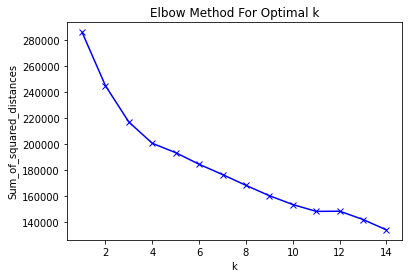

In [48]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Takeaway: 

In the plot above, we can see that the elbow is around k=3 and k=4. It is still relatively unclear to me and I would like to conduct more tests to have a more certain optimal K.

### Visualizing clusters LIMIT by BILL1

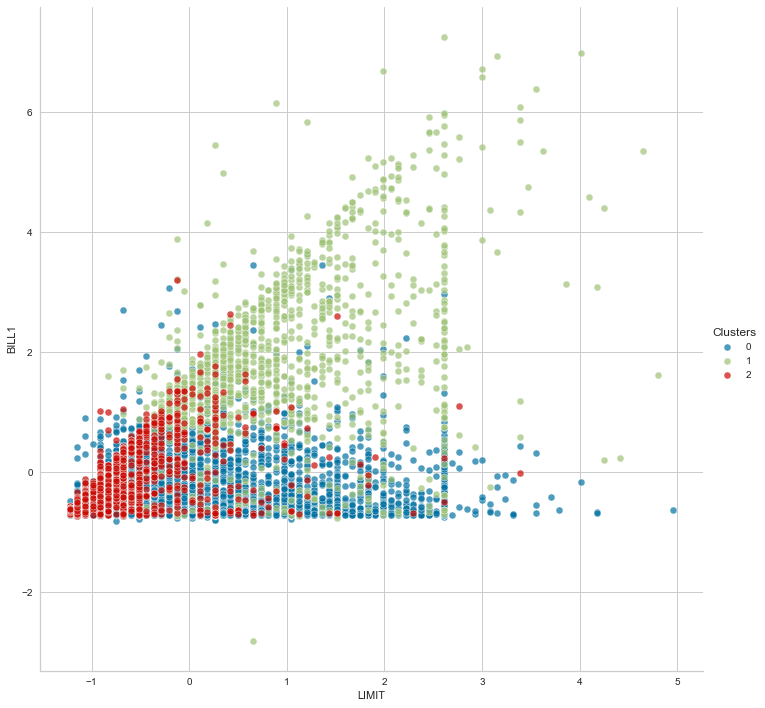

In [31]:
f=sns.FacetGrid(kmeans_data, hue='Clusters', height=10)
f.map(sns.scatterplot,"LIMIT","BILL1",alpha=0.7)
f.add_legend()
plt.show()

Takeaway:

The Kmeans clustering has identified that there are 3 clusters

1st cluster: Low credit limit awarded, and low to medium bill amount

2nd cluster: Low to high credit limit awarded but low bill amounts

3rd cluster: Low to high credit limit awarded and medium to high bill amounts.

I can see that there the clusters intersect each other and are not very distinct from each other. Therefore I feel that there could be improvements made to my dataset that can help create more distinct clusters.


# <font color= maroon> Recommendations & Conclusion

From our logistic regression to predict clients default, it was previously identified that the top 3 main contributing factors were the 1.Payment Status, 2.Credit Limit awarded and 3. Bill Amount.

#### Reasoning and solution 1
Payment status makes sense to be one of the biggest indicators to a customer defaulting as if a customer is late on a payment, he/she may tend to be late on others. 

One solution banks can implement is to incentivise early payments via the form of a discount. A small percentage of the clients bill could be discounted if he/she pays their bill early.

#### Reasoning and solution 2
The other factor that plays apart in clients defaulting is the amount of Credit Limit awarded. One possible reasoning for this is that clients will have a higher purchasing power. In our clustering visualization, we can see that clients in the 3rd cluster who were awarded meduim to high credit limit amount, would also tend to have medium to high limit bill amounts at the end of the month. Some clients may have been awarded too much credit then they can handle. Too much credit available is that may lead to increased spending, further increasing debt.

One solution for this is that banks can reduce the amount of credit limit awarded for delayed payments. Linking to the first factor that affects clients defaulting, when clients have a repeated amount of late payments, banks can gradually reduce the credit limit awarded to the client each month to reduce risk exposure.

#### Reasoning 3
Bill Amount could play a factor in the likelihood of clients defaulting. As clients spend more, they incur a higher bill. However if not paid on time, these charges could be stacked with interest rates. Further increasing the initial bill and making it harder for clients to pay on time. From the correlation matrix as well, we can see that the BILL columns were highly correlated with one another.

### In conclusion,
There may be many other factors that affect a client defaulting which are not present in this dataset. Using all factors in the logistic regression model allowed me to predict a client defaulting with high accuracy, thus factors that affect a client defaulting could be based on a combination of factors instead of one or a few only.



# <font color= maroon> References

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

(Categorical and One-Hot Encoding)

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 

(Determining the optimal value of K)

https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029#:~:text=Normalization%20is%20a%20technique%20often,dataset%20does%20not%20require%20normalization.

(Why normalizing is neccessary for Machine Learning)

https://www.kaggle.com/yugagrawal95/k-means-clustering-using-seaborn-visualization

(Visualizing Kmeans Clustering)